In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/summer_olympics.csv")
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [ ]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

### In how many cities Summer Olympics is held so far?

In [ ]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [ ]:
len(df['City'].unique())

22

**so the total number of cities in which olympics has been plyed is -: 22**

# Which sport is having most number of Gold Medals so far?

In [ ]:
totg = df["Gold" == df["Medal"]]
gold = totg.groupby('Sport')['Medal'].count().sort_values(ascending = False).reset_index().rename(columns={'Medal':'Golds'})
gold


,Sport,Golds
0,Aquatics,1421
1,Athletics,1215
2,Rowing,890
3,Gymnastics,820
4,Fencing,552
5,Football,503
6,Hockey,486
7,Sailing,412
8,Wrestling,391
9,Shooting,384


In [ ]:
gold.head()

,Sport,Golds
0,Aquatics,1421
1,Athletics,1215
2,Rowing,890
3,Gymnastics,820
4,Fencing,552


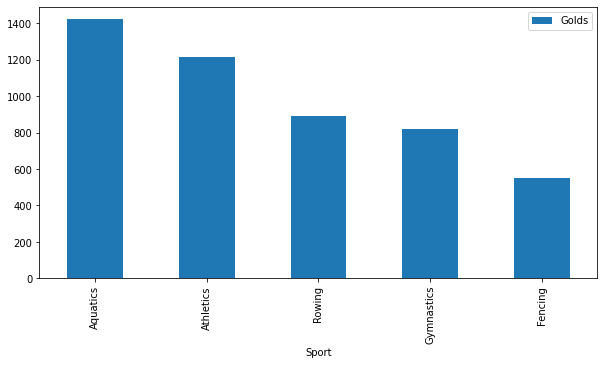

In [ ]:
gold.head().plot(x='Sport', y='Golds',kind='bar',figsize=(10,5))

**Sport having most number of Gold Medals = Aquatics**

# Which sport is having most number of medals so far?

In [ ]:
medal = df.groupby("Sport")["Medal"].count().sort_values(ascending = False).reset_index().head()
medal

,Sport,Medal
0,Aquatics,4170
1,Athletics,3638
2,Rowing,2667
3,Gymnastics,2307
4,Fencing,1613


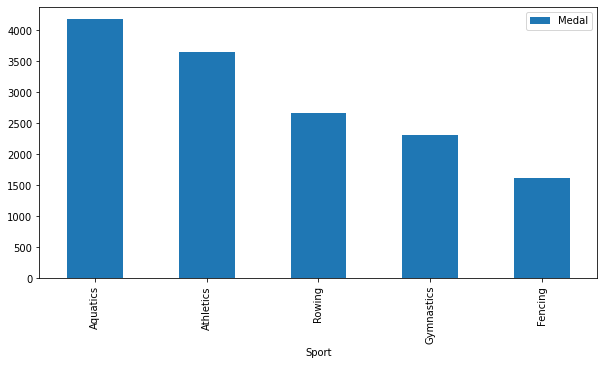

In [ ]:
medal.plot(x="Sport", y="Medal", kind="bar", figsize=(10,5))

**Sport having most number of Medals = Aquatics**

# Which player has won most number of medals?

In [ ]:
player = df.groupby("Athlete")["Medal"].count().sort_values(ascending= False).reset_index().head()
player

,Athlete,Medal
0,"PHELPS, Michael",22
1,"LATYNINA, Larisa",18
2,"ANDRIANOV, Nikolay",15
3,"MANGIAROTTI, Edoardo",13
4,"SHAKHLIN, Boris",13


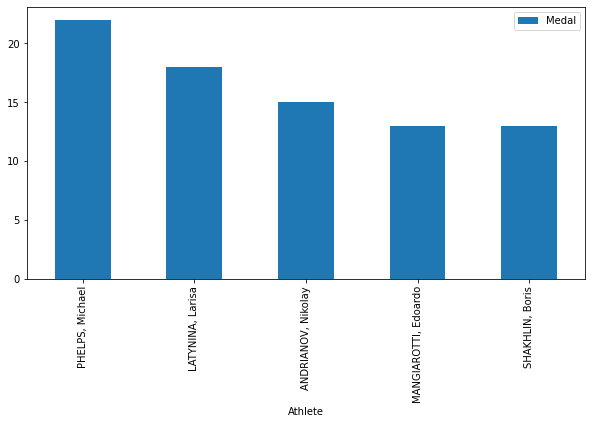

In [ ]:
player.plot(x="Athlete", y="Medal", kind="bar", figsize=(10,5))

**Player won most number of medals = Michael Phelps**

# Which player has won most number Gold Medals of medals?

In [ ]:
player_gold = totg.groupby("Athlete")["Medal"].count().sort_values(ascending= False).reset_index().head().rename(columns = {'Medal': 'Gold'})
player_gold

,Athlete,Gold
0,"PHELPS, Michael",18
1,"NURMI, Paavo",9
2,"SPITZ, Mark",9
3,"LEWIS, Carl",9
4,"LATYNINA, Larisa",9


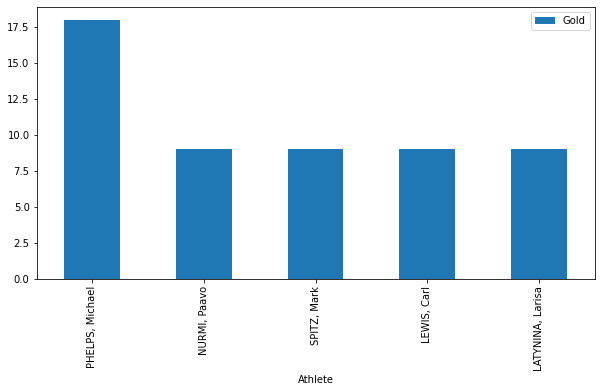

In [ ]:
player_gold.plot(x="Athlete", y="Gold", kind="bar", figsize=(10,5))

**Player won most number of Gold = Michael Phelps**

# In which year India won first Gold Medal in Summer Olympics?

In [ ]:
ind = df["IND" == df["Country"]].head()
ind_medal = pd.DataFrame(ind, columns = ["Year","Athlete", "Medal"])
ind_medal

,Year,Athlete,Medal
241,1900,"PRITCHARD, Norman",Silver
244,1900,"PRITCHARD, Norman",Silver
5512,1928,"ALLEN, Richard James",Gold
5513,1928,"CHAND, Dyan",Gold
5514,1928,"GATELEY, Maurice A.",Gold


**Year India won first Gold Medal = 1900**

# Which event is most popular in terms on number of players?

In [ ]:
event = df.groupby("Event")["Athlete"].count().sort_values(ascending = False).reset_index().head()
event

,Event,Athlete
0,Football,1497
1,Hockey,1422
2,Team Competition,1147
3,Basketball,1012
4,Handball,973


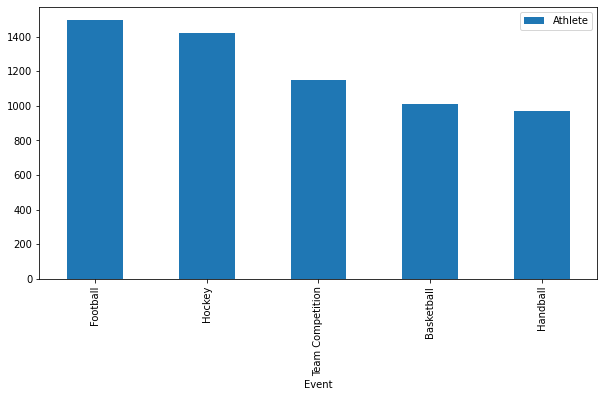

In [ ]:
event.plot(x="Event", y="Athlete", kind="bar", figsize=(10,5))

**Most number of players in event = Football**

# Which sport is having most female Gold Medalists?

In [ ]:
women = df["Women" == df["Gender"]]
female_gold = women["Gold" == df["Medal"]]
sports_women = female_gold.groupby("Sport")["Medal"].count().sort_values(ascending= False).reset_index().rename(columns={"Medal": "Gold"}).head()
sports_women

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Sport,Gold
0,Aquatics,589
1,Athletics,389
2,Gymnastics,268
3,Rowing,217
4,Volleyball,166


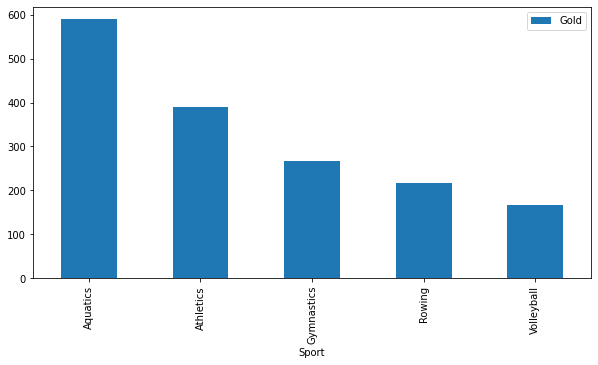

In [ ]:
sports_women.plot(x="Sport", y="Gold", kind="bar", figsize=(10,5))

**Sport having most female Gold Medalists = Aquatics**